In [19]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from costs import * 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Least squares and linear basis functions models
## Least squares

In [2]:
def least_squares(y, tx):
    w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(tx),tx)),np.transpose(tx)),y)
    mse = compute_loss(y, tx, w)
    return mse, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    mse, w = least_squares(y,tx)
    print("result:",w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    #raise NotImplementedError

test_your_least_squares()

result: [ 73.293922    13.47971243]


## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [47]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [5]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""    
    Phi_tilde = np.ones((len(x),1))
    for i in range(1, degree+1):
        power_column = []
        for j in range (len(x)):
            power_column = np.append(power_column, np.power(x[j],i))
            #Phi.append(x[j]**i)
        #print(power_column.shape)    
        #np.concatenate((Phi, power_column), axis=1)
        Phi_tilde = np.concatenate((Phi_tilde,power_column.reshape([len(x),1])), axis=1)
    
    return Phi_tilde

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773749
Processing 3th experiment, degree=7, rmse=0.24965870360910164
Processing 4th experiment, degree=12, rmse=1.638813606289307


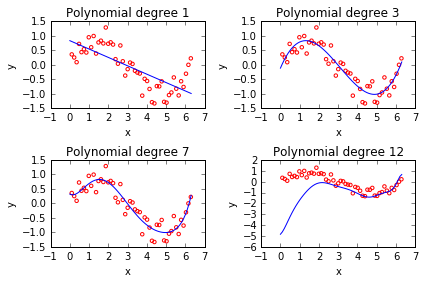

In [8]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        Phi_tilde= build_poly(x,degree)
        #print(Phi_tilde)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        #raise NotImplementedError
        mse, weight = least_squares(y, Phi_tilde)
        rmse = np.sqrt(2*mse)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        
        #raise NotImplementedError

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [26]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    x = x.reshape([len(x),1])
    y = y.reshape([len(y),1])
    xy = np.concatenate((x, y), axis=1)
    random_xy = np.random.shuffle(xy)
    x = xy[:,0]
    y = xy[:,1]
    
    #ratio = np.rint(len(x)*ratio)
    ratio = np.round(len(x)*ratio).astype(np.int)
    
    x_tr = x[0:ratio]
    x_te = x[ratio:len(x)]
    y_tr = y[0:ratio]
    y_te = y[ratio:len(y)]
    
    return x_tr, y_tr, x_te, y_te

Then, test your `split_data` function below.

In [27]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    x_tr, y_tr, x_te, y_te = split_data(x, y, ratio, seed)
    
    Phi_tr = build_poly(x_tr,degree)
    Phi_te = build_poly(x_te,degree)    
    
    mse_tr, weight_tr = least_squares(y_tr, Phi_tr)    
    
    #Prediction output
    y_te_pr = np.dot(Phi_te, weight_tr)
    #Mse output compared to test data
    mse_te = (y_te - y_te_pr)**2
    mse_te = np.sum(mse_te)/(2*len(y_te))#, weight_te = least_squares(y_te, Phi_te)
    
    
    rmse_tr = np.sqrt(2*mse_tr)
    rmse_te = np.sqrt(2*mse_te)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=2.252, Testing RMSE=2.095
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.900, Testing RMSE=1.803
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=4.852, Testing RMSE=4.108
proportion=0.1, degree=12, Training RMSE=13.260, Testing RMSE=236.883


# Ridge Regression
Please fill in the function below.

In [28]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    M = tx.shape[1]
    N = len(y)
    big_lamb = lamb*2*N
    #w = np.dot(np.dot(np.linalg.inv(np.dot(tx.T,tx) + big_lamb*np.eye(M)), tx.T),y)
    w = np.linalg.solve(np.dot(tx.T,tx) + big_lamb*np.eye(M), np.dot(tx.T, y))
    return w

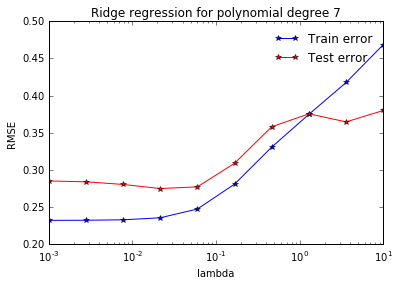

In [48]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10) 
    rmse_tr = []
    rmse_te = []
    for lamb in lambdas:
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split the data, and return train and test data: TODO
        # ***************************************************
        x_tr, y_tr, x_te, y_te = split_data(x, y, ratio, seed)

        # ***************************************************
        # INSERT YOUR CODE HERE
        # form train and test data with polynomial basis function: TODO
        # ***************************************************
        Phi_tr = build_poly(x_tr,degree)
        Phi_te = build_poly(x_te,degree)    

        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with different lambda: TODO
        # ***************************************************

        weight_tr = ridge_regression(y_tr, Phi_tr, lamb)
        mse_tr = compute_loss(y_tr, Phi_tr, weight_tr)
        mse_te = compute_loss(y_te, Phi_te, weight_tr)
        rmse_tr.append(np.sqrt(2*mse_tr))
        rmse_te.append(np.sqrt(2*mse_te))

    plot_train_test(rmse_tr, rmse_te, lambdas, degree)
seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)